In [1]:
import pandas as pd #<- package used to import and organize data
import numpy as np #<- package used to import and organize data
import math
import os #<- package used to work with system file paths
import seaborn as sns #<- package used to plot graphs
from matplotlib import pyplot as plt #<- another package used to plot graphs
from itertools import cycle #<- package used to iterate down rows (used in step 5 to add tap column)
import ipywidgets as widgets #<- widget tool to generate button and tab for graphs
from IPython.display import display #<- displays widgets
from tkinter import Tk, filedialog #<- Tkinter is a GUI package
import pingouin as pg
from pingouin import ttest
from scipy.stats import ttest_ind
print("done step 1")

done step 1


/opt/miniconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/opt/miniconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# PD Data ONLY

In [2]:
os.chdir('/Volumes/JosephBSR/Ben_BSR_all')

In [4]:
# PD_tap=pd.read_csv('/Users/Joseph/Desktop/PD_Screen_TapHab/hab_output.csv')
# PD_tap = PD_tap.iloc[: , 1:]
PD_baseline = pd.read_csv('baseline_output.csv')
PD_baseline = PD_baseline.iloc[: , 1:]
PD_baseline = PD_baseline.drop(columns=["x","y"])
PD_baseline[['Genotype', 'Treatment']] = PD_baseline['Strain'].str.split('_', 1, expand=True)
# print(PD_tap)
print(PD_baseline)

<ipython-input-4-0e20653e93c3>:6: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  PD_baseline[['Genotype', 'Treatment']] = PD_baseline['Strain'].str.split('_', 1, expand=True)


         time_bin  worm     time     speed  angularspeed  pathlength   kink  \
0             4.0   166    3.959  0.187700        9.7000     0.02400  49.30   
1             4.0   242    3.715  0.214500       24.7500     0.06700  74.44   
2             4.0   243    3.803  0.303000       17.7500     0.06300  48.25   
3             4.0   370    3.785  0.227900       32.5600     0.05680  19.78   
4             4.0   462    3.863  0.237500        1.2000     0.04565  44.22   
...           ...   ...      ...       ...           ...         ...    ...   
1442153     420.0   102  419.500  0.017470        1.9620     3.87500  43.12   
1442154     420.0   105  419.500  0.014080        0.7153    17.27000  20.16   
1442155     420.0   106  419.500  0.007717        0.5615    28.58000  40.97   
1442156     420.0   107  419.500  0.030330        4.4920     4.98400  35.88   
1442157     420.0   108  419.500  0.022920        3.0080     7.01600  44.66   

           bias  curve  dir      crab  length  midl

In [5]:
PD_baseline_last100 = PD_baseline[((PD_baseline.time <= 420) & (PD_baseline.time >= 320))]
PD_baseline_last100 = PD_baseline_last100.reset_index()
print(PD_baseline_last100)

          index  time_bin  worm   time     speed  angularspeed  pathlength  \
0        208005     320.0   374  320.0  0.259800      137.0000      -0.034   
1        208536     321.0     9  320.5  0.238800        8.9450      41.840   
2        208537     321.0    11  320.5  0.246200       18.7300       3.623   
3        208538     321.0    12  320.5  0.270300       31.0000      11.030   
4        208539     321.0    14  320.5  0.250000       28.0500       8.390   
...         ...       ...   ...    ...       ...           ...         ...   
321157  1442153     420.0   102  419.5  0.017470        1.9620       3.875   
321158  1442154     420.0   105  419.5  0.014080        0.7153      17.270   
321159  1442155     420.0   106  419.5  0.007717        0.5615      28.580   
321160  1442156     420.0   107  419.5  0.030330        4.4920       4.984   
321161  1442157     420.0   108  419.5  0.022920        3.0080       7.016   

         kink    bias  curve       dir      crab  length  midli

In [6]:
tt = ttest_ind(PD_baseline_last100["bias"], PD_baseline_last100[PD_baseline_last100.Genotype == "N2"]["bias"], equal_var = False)
print(tt)

Ttest_indResult(statistic=-37.89446950769279, pvalue=0.0)


In [7]:
list = PD_baseline_last100["Genotype"].unique()
print(list)

['N2' 'R07G3.8(tm5683)' 'cat-2(e1112)' 'gba-2(tm4623)' 'gba-4(tm3314)'
 'hipr-1(ok1081)' 'igcm-2(ok1527)' 'lfe-2(tm14109)' 'rskd-1(tm4031)'
 'sac-2(ok2743)' 'set-2(ok1484)']


In [8]:
def TTest_New(DatasetList, Type, DF_ref, output):
    for a in DatasetList:
        Tstat = ttest_ind(DF_ref[DF_ref.Genotype == a][Type], DF_ref[DF_ref.Genotype == "N2"][Type],equal_var=False)[0]
        row = [a, Tstat]
        output.loc[len(output)] = row
    print(output)

In [ ]:
# # PD_baseline_instantspeed_T = pd.DataFrame(columns = ["Genotype", "Instantaneous Speed"])
# # PD_baseline_intspeed_T = pd.DataFrame(columns = ["Genotype", "Interval Speed"])

PD_baseline_length_T = pd.DataFrame(columns = ["Genotype", "length"])
PD_baseline_midline_T = pd.DataFrame(columns = ["Genotype", "midline"])
PD_baseline_width_T = pd.DataFrame(columns = ["Genotype", "width"])
PD_baseline_morphwidth_T = pd.DataFrame(columns = ["Genotype", "morphwidth"])
PD_baseline_area_T = pd.DataFrame(columns = ["Genotype", "area"])

# # PD_baseline_aspectratio_T = pd.DataFrame(columns = ["Genotype", "Aspect Ratio"])

# PD_baseline_speed_T = pd.DataFrame(columns = ["Genotype", "speed"])
# PD_baseline_angularspeed_T = pd.DataFrame(columns = ["Genotype", "angularspeed"])
# PD_baseline_bias_T = pd.DataFrame(columns = ["Genotype", "bias"])
# PD_baseline_kink_T =  pd.DataFrame(columns = ["Genotype", "kink"])
# PD_baseline_curve_T = pd.DataFrame(columns = ["Genotype", "curve"])
# PD_baseline_crab_T = pd.DataFrame(columns = ["Genotype", "crab"])

In [ ]:
# # TTest_New(PD_baseline_last100["Genotype"].unique(), "Instantaneous Speed", PD_baseline_last100, PD_baseline_instantspeed_T)
# # TTest_New(PD_baseline_last100["Genotype"].unique(), "Interval Speed", PD_baseline_last100, PD_baseline_intspeed_T)

TTest_New(PD_baseline_last100["Genotype"].unique(), "length", PD_baseline_last100, PD_baseline_length_T)
TTest_New(PD_baseline_last100["Genotype"].unique(), "midline", PD_baseline_last100, PD_baseline_midline_T)
TTest_New(PD_baseline_last100["Genotype"].unique(), "width", PD_baseline_last100, PD_baseline_width_T)
TTest_New(PD_baseline_last100["Genotype"].unique(), "morphwidth", PD_baseline_last100, PD_baseline_morphwidth_T)
TTest_New(PD_baseline_last100["Genotype"].unique(), "area", PD_baseline_last100, PD_baseline_area_T)

# # TTest_New(PD_baseline_last100["Genotype"].unique(), "Aspect Ratio", PD_baseline_last100, PD_baseline_aspectratio_T)
# TTest_New(PD_baseline_last100["Genotype"].unique(), "speed", PD_baseline_last100, PD_baseline_speed_T)
# TTest_New(PD_baseline_last100["Genotype"].unique(), "angularspeed", PD_baseline_last100, PD_baseline_angularspeed_T)
# TTest_New(PD_baseline_last100["Genotype"].unique(), "bias", PD_baseline_last100, PD_baseline_bias_T)
# TTest_New(PD_baseline_last100["Genotype"].unique(), "kink", PD_baseline_last100, PD_baseline_kink_T)
# TTest_New(PD_baseline_last100["Genotype"].unique(), "curve", PD_baseline_last100, PD_baseline_curve_T)
# TTest_New(PD_baseline_last100["Genotype"].unique(), "crab", PD_baseline_last100, PD_baseline_crab_T)

In [ ]:
print(PD_baseline_length_T.iloc[:,1])

In [ ]:
# # PD_baseline_Tstats = PD_baseline_instantspeed_T

PD_baseline_Tstats = PD_baseline_length_T
PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_midline_T.iloc[:,1])
PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_width_T.iloc[:,1])
PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_morphwidth_T.iloc[:,1])
PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_area_T.iloc[:,1])

# # PD_baseline_Tstats = PD_baseline_speed_T
# # PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_intspeed_T.iloc[:,1])

# PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_speed_T.iloc[:,1])
# PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_angularspeed_T.iloc[:,1])
# PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_bias_T.iloc[:,1])
# PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_kink_T.iloc[:,1])
# PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_curve_T.iloc[:,1])
# PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_crab_T.iloc[:,1])

# # PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_width_T.iloc[:,1])
# # PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_length_T.iloc[:,1])
# # PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_area_T.iloc[:,1])
# # PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_angularspeed_T.iloc[:,1])

print(PD_baseline_Tstats)

In [ ]:
PD_baseline_Tstats = PD_baseline_Tstats.set_index("Genotype")
print(PD_baseline_Tstats)

In [ ]:
PD_baseline_Tstats_sort = PD_baseline_Tstats.sort_index()
print(PD_baseline_Tstats_sort)

In [ ]:
sns.set_context('notebook')
plt.figure(figsize = (14,14))
ax = sns.heatmap(data = PD_baseline_Tstats_sort, 
                 annot = False, 
                 linewidth = 0.5, 
                 square = True, 
                 cmap = "vlag", 
                 center = 0, 
                 vmax = 400,
                 vmin = -400, 
                 xticklabels = 1,
                 yticklabels = 1,
                 cbar_kws={"shrink": .3})
# plt.savefig(f'{StrainName}_Speed_{ISI}ISI.png_ByPlate', format='png', dpi=450)
plt.show()

# T stat analysis by gene

In [9]:
PD_gene_baseline_length_T = pd.DataFrame(columns = ["Genotype", "length"])
PD_gene_baseline_midline_T = pd.DataFrame(columns = ["Genotype", "midline"])
PD_gene_baseline_width_T = pd.DataFrame(columns = ["Genotype", "width"])
PD_gene_baseline_morphwidth_T = pd.DataFrame(columns = ["Genotype", "morphwidth"])
PD_gene_baseline_area_T = pd.DataFrame(columns = ["Genotype", "area"])

print(PD_gene_baseline_midline_T)
# # PD_baseline_aspectratio_T = pd.DataFrame(columns = ["Genotype", "Aspect Ratio"])

# PD_gene_baseline_speed_T = pd.DataFrame(columns = ["Genotype", "speed"])
# PD_gene_baseline_angularspeed_T = pd.DataFrame(columns = ["Genotype", "angularspeed"])
# PD_gene_baseline_bias_T = pd.DataFrame(columns = ["Genotype", "bias"])
# PD_gene_baseline_kink_T =  pd.DataFrame(columns = ["Genotype", "kink"])
# PD_gene_baseline_curve_T = pd.DataFrame(columns = ["Genotype", "curve"])
# PD_gene_baseline_crab_T = pd.DataFrame(columns = ["Genotype", "crab"])

Empty DataFrame
Columns: [Genotype, midline]
Index: []


In [10]:
# NEW, CREATED BY BEN
PD_baseline_last100_OffFood = PD_baseline_last100[PD_baseline_last100["Treatment"] == "OffFood"].dropna().add_suffix('_OffFood')
PD_baseline_last100_OffFood = PD_baseline_last100_OffFood.rename(columns = {'Genotype_OffFood': 'Genotype'})

PD_baseline_last100_OnFood = PD_baseline_last100[PD_baseline_last100["Treatment"] == "OnFood"].dropna().add_suffix('_OnFood')
PD_baseline_last100_OnFood = PD_baseline_last100_OnFood.rename(columns = {'Genotype_OnFood': 'Genotype'})

# print(PD_baseline_last100_OffFood.head())
# print(PD_baseline_last100_OnFood.columns)
# print(PD_baseline_last100.shape)
# print(PD_baseline_last100_OffFood.shape)
# print(PD_baseline_last100_OnFood.shape)

In [11]:
# NEW, CREATED BY BEN
PD_gene_baseline_speed_T_OffFood = pd.DataFrame(columns = ["Genotype", "speed_OffFood"])
PD_gene_baseline_angularspeed_T_OffFood = pd.DataFrame(columns = ["Genotype", "angularspeed_OffFood"])
PD_gene_baseline_bias_T_OffFood = pd.DataFrame(columns = ["Genotype", "bias_OffFood"])
PD_gene_baseline_curve_T_OffFood = pd.DataFrame(columns = ["Genotype", "curve_OffFood"])
PD_gene_baseline_crab_T_OffFood = pd.DataFrame(columns = ["Genotype", "crab_OffFood"])
PD_gene_baseline_kink_T_OffFood = pd.DataFrame(columns = ["Genotype", "kink_OffFood"])

PD_gene_baseline_speed_T_OnFood = pd.DataFrame(columns = ["Genotype", "speed_OnFood"])
PD_gene_baseline_angularspeed_T_OnFood = pd.DataFrame(columns = ["Genotype", "angularspeed_OnFood"])
PD_gene_baseline_bias_T_OnFood = pd.DataFrame(columns = ["Genotype", "bias_OnFood"])
PD_gene_baseline_curve_T_OnFood = pd.DataFrame(columns = ["Genotype", "curve_OnFood"])
PD_gene_baseline_crab_T_OnFood = pd.DataFrame(columns = ["Genotype", "crab_OnFood"])
PD_gene_baseline_kink_T_OnFood = pd.DataFrame(columns = ["Genotype", "kink_OnFood"])

In [12]:
# PD_baseline_last100.to_csv('/Users/Joseph/Desktop/PD_Screen_TapHab/Baseline100Data.csv')
PD_baseline_last100 = PD_baseline_last100.dropna()
print(PD_baseline_last100)

          index  time_bin  worm   time     speed  angularspeed  pathlength  \
0        208005     320.0   374  320.0  0.259800      137.0000      -0.034   
1        208536     321.0     9  320.5  0.238800        8.9450      41.840   
2        208537     321.0    11  320.5  0.246200       18.7300       3.623   
3        208538     321.0    12  320.5  0.270300       31.0000      11.030   
4        208539     321.0    14  320.5  0.250000       28.0500       8.390   
...         ...       ...   ...    ...       ...           ...         ...   
321157  1442153     420.0   102  419.5  0.017470        1.9620       3.875   
321158  1442154     420.0   105  419.5  0.014080        0.7153      17.270   
321159  1442155     420.0   106  419.5  0.007717        0.5615      28.580   
321160  1442156     420.0   107  419.5  0.030330        4.4920       4.984   
321161  1442157     420.0   108  419.5  0.022920        3.0080       7.016   

         kink    bias  curve       dir      crab  length  midli

In [13]:
# print(PD_baseline_last100.Genotype.unique())
# print(PD_baseline_last100_OffFood.Genotype.unique())
# print(PD_baseline_last100_OnFood.Genotype.unique())
# print((PD_baseline_last100.Genotype.unique() == PD_baseline_last100_OffFood.Genotype.unique()) & 
#       (PD_baseline_last100.Genotype.unique()== PD_baseline_last100_OnFood.Genotype.unique()))

type(PD_baseline_last100.Genotype.unique()[1])

str

In [14]:
# ttest = ttest_ind(PD_baseline_last100[PD_baseline_last100.Gene=='F53B2.5']['Instantaneous Speed'],
#          PD_baseline_last100[PD_baseline_last100.Gene=='N2']['Instantaneous Speed'],
#          equal_var=False)
# ttest[0]

In [15]:
def TTest_Gene(DatasetList, Type, DF_ref, output):
    for a in DatasetList:
        Tstat = ttest_ind(DF_ref[DF_ref.Genotype == a][Type], DF_ref[DF_ref.Genotype == "N2"][Type], equal_var = False)[0]
        row = [a, Tstat]
        output.loc[len(output)] = row
    print(output)

In [16]:
# TTest_Gene(PD_baseline_last100.Gene.unique(), 'Instantaneous Speed', PD_baseline_last100, PD_gene_baseline_instantspeed_T)

In [17]:
# PD_gene_baseline_instantspeed_T.to_csv('/Users/Joseph/Desktop/PD_Screen_TapHab/baselineinstantspeedgene.csv')
# PD_baseline_last100.to_csv('/Users/Joseph/Desktop/PD_Screen_TapHab/Baseline100Data.csv')

In [18]:
# # TTest_New(PD_baseline_last100["Genotype"].unique(), "Instantaneous Speed", PD_baseline_last100, PD_baseline_instantspeed_T)
# # TTest_New(PD_baseline_last100["Genotype"].unique(), "Interval Speed", PD_baseline_last100, PD_baseline_intspeed_T)

TTest_Gene(PD_baseline_last100["Genotype"].unique(), "length", PD_baseline_last100, PD_gene_baseline_length_T)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "midline", PD_baseline_last100, PD_gene_baseline_midline_T)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "width", PD_baseline_last100, PD_gene_baseline_width_T)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "morphwidth", PD_baseline_last100, PD_gene_baseline_morphwidth_T)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "area", PD_baseline_last100, PD_gene_baseline_area_T)

# # TTest_New(PD_baseline_last100["Genotype"].unique(), "Aspect Ratio", PD_baseline_last100, PD_baseline_aspectratio_T)
# TTest_Gene(PD_baseline_last100["Genotype"].unique(), "speed", PD_baseline_last100, PD_gene_baseline_speed_T)
# TTest_Gene(PD_baseline_last100["Genotype"].unique(), "angularspeed", PD_baseline_last100, PD_gene_baseline_angularspeed_T)
# TTest_Gene(PD_baseline_last100["Genotype"].unique(), "bias", PD_baseline_last100, PD_gene_baseline_bias_T)
# TTest_Gene(PD_baseline_last100["Genotype"].unique(), "kink", PD_baseline_last100, PD_gene_baseline_kink_T)
# TTest_Gene(PD_baseline_last100["Genotype"].unique(), "curve", PD_baseline_last100, PD_gene_baseline_curve_T)
# TTest_Gene(PD_baseline_last100["Genotype"].unique(), "crab", PD_baseline_last100, PD_gene_baseline_crab_T)

           Genotype      length
0                N2    0.000000
1   R07G3.8(tm5683)   16.483056
2      cat-2(e1112)  -56.269253
3     gba-2(tm4623)  -53.158078
4     gba-4(tm3314)  -21.875496
5    hipr-1(ok1081)  -90.858139
6    igcm-2(ok1527)  -74.607594
7    lfe-2(tm14109)   54.290409
8    rskd-1(tm4031) -135.587794
9     sac-2(ok2743)  -55.015440
10    set-2(ok1484) -146.529812
           Genotype     midline
0                N2    0.000000
1   R07G3.8(tm5683)  -19.011565
2      cat-2(e1112)  -42.054900
3     gba-2(tm4623)  -95.773314
4     gba-4(tm3314)  -75.423044
5    hipr-1(ok1081) -108.750670
6    igcm-2(ok1527)  -84.087971
7    lfe-2(tm14109)   62.974980
8    rskd-1(tm4031) -177.199850
9     sac-2(ok2743)  -39.036855
10    set-2(ok1484) -260.012825
           Genotype      width
0                N2   0.000000
1   R07G3.8(tm5683) -45.286536
2      cat-2(e1112)  40.429079
3     gba-2(tm4623) -37.197459
4     gba-4(tm3314) -75.318120
5    hipr-1(ok1081)   9.065174
6    igcm-2(ok1

In [19]:
# NEW, CREATED BY BEN

TTest_Gene(PD_baseline_last100["Genotype"].unique(), "speed_OffFood",
           PD_baseline_last100_OffFood, PD_gene_baseline_speed_T_OffFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "angularspeed_OffFood",
           PD_baseline_last100_OffFood, PD_gene_baseline_angularspeed_T_OffFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "bias_OffFood",
           PD_baseline_last100_OffFood, PD_gene_baseline_bias_T_OffFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "curve_OffFood",
           PD_baseline_last100_OffFood, PD_gene_baseline_curve_T_OffFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "crab_OffFood",
           PD_baseline_last100_OffFood, PD_gene_baseline_crab_T_OffFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "kink_OffFood",
           PD_baseline_last100_OffFood, PD_gene_baseline_kink_T_OffFood)

TTest_Gene(PD_baseline_last100["Genotype"].unique(), "speed_OnFood",
           PD_baseline_last100_OnFood, PD_gene_baseline_speed_T_OnFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "angularspeed_OnFood",
           PD_baseline_last100_OnFood, PD_gene_baseline_angularspeed_T_OnFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "bias_OnFood",
           PD_baseline_last100_OnFood, PD_gene_baseline_bias_T_OnFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "curve_OnFood",
           PD_baseline_last100_OnFood, PD_gene_baseline_curve_T_OnFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "crab_OnFood",
           PD_baseline_last100_OnFood, PD_gene_baseline_crab_T_OnFood)
TTest_Gene(PD_baseline_last100["Genotype"].unique(), "kink_OnFood",
           PD_baseline_last100_OnFood, PD_gene_baseline_kink_T_OnFood)

           Genotype  speed_OffFood
0                N2       0.000000
1   R07G3.8(tm5683)     -51.355956
2      cat-2(e1112)      40.394337
3     gba-2(tm4623)     -31.882398
4     gba-4(tm3314)     -81.463034
5    hipr-1(ok1081)      -2.135179
6    igcm-2(ok1527)     -24.090558
7    lfe-2(tm14109)     -58.031298
8    rskd-1(tm4031)    -133.115963
9     sac-2(ok2743)     -66.176272
10    set-2(ok1484)     -34.045830
           Genotype  angularspeed_OffFood
0                N2              0.000000
1   R07G3.8(tm5683)            -49.865523
2      cat-2(e1112)             25.671580
3     gba-2(tm4623)            -33.788622
4     gba-4(tm3314)            -65.655024
5    hipr-1(ok1081)             20.442945
6    igcm-2(ok1527)             16.709099
7    lfe-2(tm14109)            -55.630418
8    rskd-1(tm4031)            -26.898088
9     sac-2(ok2743)              4.858696
10    set-2(ok1484)            -21.128112
           Genotype  bias_OffFood
0                N2      0.000000
1   R07G

In [20]:
PD_gene_baseline_Tstats = PD_gene_baseline_length_T
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_midline_T.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_width_T.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_morphwidth_T.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_area_T.iloc[:,1])

# # PD_baseline_Tstats = PD_baseline_speed_T
# # PD_baseline_Tstats = PD_baseline_Tstats.join(PD_baseline_intspeed_T.iloc[:,1])

# PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_speed_T.iloc[:,1])
# PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_angularspeed_T.iloc[:,1])
# PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_bias_T.iloc[:,1])
# PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_kink_T.iloc[:,1])
# PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_curve_T.iloc[:,1])
# PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_crab_T.iloc[:,1])
# PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.set_index("Genotype")
# print(PD_gene_baseline_Tstats)

# # PD_gene_habituation_Tstats=PD_gene_recovery_dura
# # PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_recovery_prob.iloc[:,1])
# # PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_recovery_speed.iloc[:,1])
# # PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_init_dura.iloc[:,1])
# # PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_init_prob.iloc[:,1])
# # PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_init_speed.iloc[:,1])
# # PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_final_dura.iloc[:,1])
# # PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_final_prob.iloc[:,1])
# # PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_final_speed.iloc[:,1])
# # PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_hab_dura.iloc[:,1])
# # PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_hab_prob.iloc[:,1])
# # PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_hab_speed.iloc[:,1])
# # PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.set_index("dataset").dropna()                                        
# # print(PD_gene_habituation_Tstats)

In [21]:
# PD_gene_baseline_speed_T_OffFood
# PD_gene_baseline_speed_T_OffFood.iloc[:,1]

In [22]:
# NEW, CREATED BY BEN

PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_speed_T_OffFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_angularspeed_T_OffFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_bias_T_OffFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_curve_T_OffFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_crab_T_OffFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_kink_T_OffFood.iloc[:,1])

PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_speed_T_OnFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_angularspeed_T_OnFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_bias_T_OnFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_curve_T_OnFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_crab_T_OnFood.iloc[:,1])
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.join(PD_gene_baseline_kink_T_OnFood.iloc[:,1])

PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.set_index("Genotype")
print(PD_gene_baseline_Tstats)

                     length     midline      width  morphwidth        area  \
Genotype                                                                     
N2                 0.000000    0.000000   0.000000    0.000000    0.000000   
R07G3.8(tm5683)   16.483056  -19.011565 -45.286536  -23.672209   -8.875923   
cat-2(e1112)     -56.269253  -42.054900  40.429079   15.231186  -32.520982   
gba-2(tm4623)    -53.158078  -95.773314 -37.197459  -91.309138 -161.265268   
gba-4(tm3314)    -21.875496  -75.423044 -75.318120  -79.190786 -123.175722   
hipr-1(ok1081)   -90.858139 -108.750670   9.065174  -24.302509 -109.904018   
igcm-2(ok1527)   -74.607594  -84.087971  16.834926   14.071444  -62.311014   
lfe-2(tm14109)    54.290409   62.974980   0.023915   18.130469   49.468157   
rskd-1(tm4031)  -135.587794 -177.199850 -38.244528  -52.170800 -153.794442   
sac-2(ok2743)    -55.015440  -39.036855  30.651788   25.031645  -18.219690   
set-2(ok1484)   -146.529812 -260.012825 -98.528556 -139.962875 -

In [23]:
# PD_gene_baseline_Tstats_scaled = PD_gene_baseline_Tstats/40
# print(PD_gene_baseline_Tstats_scaled)

In [24]:
# # # FROM BEFORE
# # PD_gene_baseline_Tstats_scaled_sort = PD_gene_baseline_Tstats_scaled.sort_index()
# # print(PD_gene_baseline_Tstats_scaled_sort)

In [37]:
# PD_gene_Tstats_combined = pd.merge(PD_gene_baseline_Tstats, PD_gene_habituation_Tstats, on =['dataset'], how ='left')
# PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.dropna().sort_index().drop(index="N2")
PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.dropna().sort_index()
# PD_gene_baseline_Tstats = PD_gene_baseline_Tstats.dropna().sort_index()
PD_gene_baseline_Tstats_normalize = (PD_gene_baseline_Tstats - PD_gene_baseline_Tstats.mean())/PD_gene_baseline_Tstats.std()
PD_gene_baseline_Tstats_normalize_2 = PD_gene_baseline_Tstats_normalize - PD_gene_baseline_Tstats_normalize[PD_gene_baseline_Tstats_normalize.index == 'N2'].squeeze()
PD_gene_baseline_Tstats_normalize_2 = PD_gene_baseline_Tstats_normalize_2.drop(index = 'N2')
# PD_gene_Tstats_combined=PD_gene_Tstats_combined.set_index("dataset")
# PD_gene_Tstats_combined=PD_gene_Tstats_combined.sort_index()
# PD_gene_Tstats_combined=PD_gene_Tstats_combined.drop(index="N2")

print(PD_gene_baseline_Tstats_normalize)
print(PD_gene_baseline_Tstats_normalize_2)
PD_gene_baseline_Tstats_normalize_2.to_csv('NormalizedtoN2_baseline_Tstats.csv')

                   length   midline     width  morphwidth      area  \
Genotype                                                              
N2               0.835269  0.871469  0.404985    0.570228  0.891459   
R07G3.8(tm5683)  1.104205  0.654087 -0.616140    0.131113  0.791848   
cat-2(e1112)    -0.082816  0.390605  1.316582    0.852765  0.526486   
gba-2(tm4623)   -0.032054 -0.223622 -0.433746   -1.123543 -0.918372   
gba-4(tm3314)    0.478350  0.009067 -1.293294   -0.898749 -0.490904   
hipr-1(ok1081)  -0.647166 -0.372008  0.609387    0.119421 -0.341960   
igcm-2(ok1527)  -0.382023 -0.090010  0.784580    0.831252  0.192162   
lfe-2(tm14109)   1.721067  1.591537  0.405524    0.906546  1.446625   
rskd-1(tm4031)  -1.376971 -1.154669 -0.457356   -0.397532 -0.834529   
sac-2(ok2743)   -0.062359  0.425114  1.096123    1.034562  0.686985   
set-2(ok1484)   -1.555500 -2.101568 -1.816645   -2.026062 -1.949800   

                 speed_OffFood  angularspeed_OffFood  bias_OffFood  \
Genoty

In [33]:
# Gene_Orthology=pd.read_csv('/Users/Joseph/Desktop/PD_Screen_TapHab/Gene_Orthology.csv')
# Gene_Orthology=Gene_Orthology.rename(columns={"Gene":"Orthology", "Worm Gene":"dataset"})
# print(Gene_Orthology)

In [34]:
# PD_gene_Tstats_combined_normalize_joined=pd.merge(PD_gene_Tstats_combined_normalize,
#                                                  Gene_Orthology,
#                                                  on='dataset',
#                                                  how='inner')

# print(PD_gene_Tstats_combined_normalize_joined)

In [35]:
# # PD_gene_Tstats_combined_normalize_heatmap=PD_gene_Tstats_combined_normalize_joined.set_index("Orthology").sort_index()
# # PD_gene_Tstats_combined_normalize_heatmap=PD_gene_Tstats_combined_normalize_heatmap.drop(columns=['dataset','Unnamed: 0','Human Gene'])
# # print(PD_gene_Tstats_combined_normalize_heatmap)

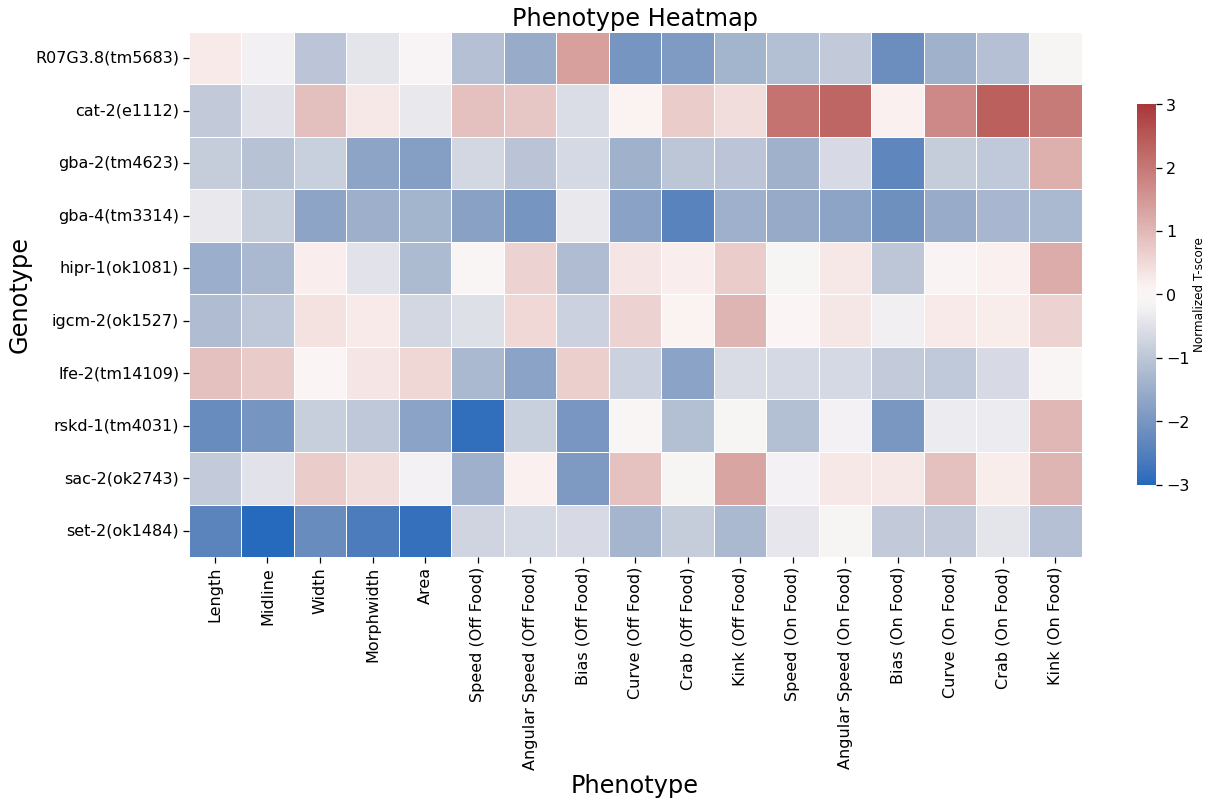

In [36]:
sns.set_context('notebook')
plt.figure(figsize=(20,14))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16) 
ax = sns.heatmap(data = PD_gene_baseline_Tstats_normalize_2, 
                 annot = False, 
                 linewidth = 0.5, 
                 square = True, 
                 cmap = "vlag", 
                 center = 0, 
                 vmax = 3,
                 vmin = -3, 
                 # xticklabels = 1,
                 xticklabels = ['Length', 'Midline', 'Width', 'Morphwidth', 'Area',
                                'Speed (Off Food)', 'Angular Speed (Off Food)', 'Bias (Off Food)',
                                'Curve (Off Food)', 'Crab (Off Food)', 'Kink (Off Food)',
                                'Speed (On Food)', 'Angular Speed (On Food)', 'Bias (On Food)',
                                'Curve (On Food)', 'Crab (On Food)', 'Kink (On Food)'],
                 yticklabels = 1,
                 cbar_kws = {"shrink": .5, "label": "Normalized T-score"})
ax.set_ylabel('Genotype', fontsize = 24)
# ax.set_xlabel('Morphological Phenotype', fontsize = 24)
# ax.set_title('Morphology Heatmap', fontsize = 24)
ax.set_xlabel('Phenotype', fontsize = 24)
ax.set_title('Phenotype Heatmap', fontsize = 24)
plt.savefig('Tstat_GENE_normalized2_square.jpg', format='jpg', dpi=450, bbox_inches = "tight")
plt.show()

In [ ]:
# PD_gene_Tstats_melted=PD_gene_Tstats_combined_normalize.reset_index()
# print(PD_gene_Tstats_melted)
# PD_gene_Tstats_melted_gene=pd.melt(PD_gene_Tstats_melted, id_vars=['dataset'],
#                                    var_name='Metric',
#                                    value_name='Normalized T_score')
# PD_gene_Tstats_melted_gene_sorted=PD_gene_Tstats_melted_gene.sort_values(by=['Normalized T_score'])
# print(PD_gene_Tstats_melted_gene)
# print(PD_gene_Tstats_melted_gene_sorted)
# # PD_gene_Tstats_melted_metric=pd.melt(PD_gene_Tstats_melted_gene, id_vars=['dataset'],
# #                              value_name='metric')


In [ ]:
# metric_palette=["k","k","k","k","k","k","k","k","k","k",
#                 "darkgray","darkgray","darkgray","darkgray",
#                 "darkgray","darkgray","darkgray","darkgray",
#                 "darkgray","darkgray","darkgray","darkgray"]

In [ ]:
# PD_gene_Tstats_combined_normalize_orthology_melted=PD_gene_Tstats_combined_normalize_heatmap.reset_index()
# PD_gene_Tstats_combined_normalize_orthology_melted=pd.melt(PD_gene_Tstats_combined_normalize_orthology_melted, id_vars=['Orthology'],
#                                    var_name='Metric',
#                                    value_name='Normalized T_score')
# PD_gene_Tstats_orthology_melted_gene_sorted=PD_gene_Tstats_combined_normalize_orthology_melted.sort_values(by=['Normalized T_score'])
# # print(PD_gene_Tstats_melted_gene)
# print(PD_gene_Tstats_orthology_melted_gene_sorted)
# # PD_gene_Tstats_melted_metric=pd.melt(PD_gene_Tstats_melted_gene, id_vars=['dataset'],
# #                              value_name='metric')



In [ ]:
# print(PD_gene_Tstats_melted_gene.dataset.unique())
# PD_gene_Tstats_combined_normalize_orthology=PD_gene_Tstats_combined_normalize_heatmap.reset_index()
# print(PD_gene_Tstats_combined_normalize_orthology.Orthology.unique())

In [ ]:
# # sns.barplot(data=PD_gene_Tstats_melted_gene[PD_gene_Tstats_melted_gene.dataset=="F53B2.5"], x="Metric", y="T_score")
# # plt.xticks(rotation=90)

# sns.set_context('notebook')
# # # plt.figure(figsize=(14,14))
# # ax = sns.barplot(data = PD_gene_Tstats_melted_gene[PD_gene_Tstats_melted_gene.dataset=="F53B2.5"], 
# #                 x="Metric",
# #                 y="T_score",
# #                 palette=metric_palette)
# # plt.xticks(rotation=90)
# # # plt.savefig('/Users/Joseph/Desktop/PD_Screen_TapHab/Tstat_GENE.png', format='png', dpi=450, bbox_inches = "tight")
# # # '/Users/Joseph/Desktop/PD_Screen_TapHab/Baseline100Data.csv'
# # plt.show()

# for x in PD_gene_Tstats_combined_normalize_orthology_melted.Orthology.unique():
#     plt.figure()
#     ax = sns.barplot(data = PD_gene_Tstats_combined_normalize_orthology_melted[PD_gene_Tstats_combined_normalize_orthology_melted.Orthology==f"{x}"], 
#                 x="Metric",
#                 y="Normalized T_score",
#                 palette=metric_palette).set_title(f"{x}")
#     plt.ylim(-3,3)
#     plt.xticks(rotation=90)
#     plt.savefig(f'/Users/Joseph/Desktop/PD_Screen_TapHab/Gene_Metrics/{x}_Metrics.png', format='png', dpi=450, bbox_inches = "tight")
#     plt.show()
# print("done")

In [ ]:
# # sns.barplot(data=PD_gene_Tstats_melted_gene_sorted[PD_gene_Tstats_melted_gene_sorted.Metric=="Instantaneous Speed"],
# #             x="dataset", y="T_score")
# # plt.xticks(rotation=90)

# for x in PD_gene_Tstats_melted_gene_sorted.Metric.unique():
#     plt.figure()
#     ax = sns.barplot(data = PD_gene_Tstats_melted_gene_sorted[PD_gene_Tstats_melted_gene_sorted.Metric==f"{x}"], 
#                 x="dataset",
#                 y="Normalized T_score",
#                 palette=["dimgray"]).set_title(f"{x}")
#     plt.xticks(rotation=90)
#     plt.ylim(-3,3)
#     plt.savefig(f'/Users/Joseph/Desktop/PD_Screen_TapHab/Metric_Scores/{x}_Metrics.png', format='png', dpi=450, bbox_inches = "tight")
#     plt.show()
# print("done")

In [ ]:
# # print(PD_recov_taps)
# # print(PD_habit_levels)
# # print(PD_baseline_last100)